# Project 1:  Projectile motion with drag (_ctd._) <a class="tocSkip">

Based on [Physics Simulations in Python](<u>https://physics.weber.edu/schroeder/scicomp/PythonManual.pdf</u>) by Daniel V. Schroeder (Weber State University, [<u>dschroeder@weber.edu</u>](dschroeder@weber.edu).  Adapted with permission by [<u>Ruth Van de Water</u>](rsvandewater@noctrl.edu) April, 2019. Last updated June 21, 2022.

# Part 2: Motion under the influence of a variable net force

In this second activity you will simulate the motion of a projectile launched across level ground with an initial speed $v_0$ and initial angle $\theta_0$ under the influence of gravity and a drag force that depends upon the object’s current velocity.  As before, you will modify the provided code to print the starting values, simulation parameters, and range and time-of-flight.  Additionally, you will have to add the drag force to the appropriate locations in the code and update the net force in the simulation loop accordingly. 

With the drag force present, there are no longer closed-form analytic expressions for the object’s trajectory with which to compare.  Therefore, you will instead validate your code by reducing the step size $\Delta t$ (`dt` in your simulation) until the calculated range and time-of-flight no longer change within a certain amount.  This incremental approach to the correct answer as the simulation step size decreases is called **_convergence_**.  Because, in real life, time is continuous (_i.e._, there is no “step size”), the object’s true trajectory cannot depend upon the value of $\Delta t$ that you use in your computer simulation.  Therefore, for simulations that proceed in discrete steps, **you must _always_ check that your final result is stable to the desired number of significant digits when you further decrease the step size**.  Checking for convergence is a standard validation procedure in all numerical simulations of this kind.


## The drag force

The drag force is a _**resistive force**_ that opposes the motion of an object. Therefore, _the direction of the drag force is opposite the direction of the velocity vector_.  The drag force on a reasonably-sized object (like a soccer ball) in air around sea-level is approximately proportional to the speed of the object squared.  In other words, 

\begin{equation}
\vec{F}_{drag} = -c_d v^2 \hat{v}.
\end{equation},

where $c_d$ is a measurable parameter that depends upon the object’s properties (shape, size, _etc._) and $\hat{v}$ is a unit vector in the same direction as the velocity.


## Code

$\color{blue}{\mathbf{Program\!:\, }}$ Copy your projectile-motion program from Part 1 into a code cell below.  (_Don't forget the_ `import` _statements!_) In this new program:

- remove the calculations of the analytic results for the range and time of flight (_because they no longer apply in the presence of a drag force_) and of the percentage differences,

- add code (_will be needed in multiple places_) to include the effect of a quadratic drag force acting on the projectile, and

- set the ratio $c_d/m$ to 0.03 m$^{-1}$.  

**Stop to think:** _Why don't the instructions above specify separate values for the object's mass $m$ and its drag coefficient $c_d$? Explain._ 

$\color{red}{\mathbf{Exercise\!:\, }}$ Set the time step to 0.1 s, launch angle to $45^o$, and initial speed to 100 m/s. Then run your code.  _Do the plots of $x$ vs. $t$, $y$ vs. $t$, and $y$ vs. $x$ look reasonable?_ If not, fix your code so that they do.  


<div class="alert alert-block alert-warning">
    <center><span style="color:black">Check in with your instructor before proceeding to the next section.</span></center>
</div>

## Validate simulation code

### Compare with limiting case

$\color{red}{\mathbf{Exercise\!:\, }}$ Change the initial speed to 20 m/s (as in Part 1) and set the drag coefficient $c_d$ to zero (_corresponding to no drag_). Check that your program gives the same results for the range and time-of-flight as your earlier simulation without air resistance.  (_If it doesn't, go back and fix your code._)

### Look for convergence

$\color{blue}{\mathbf{Program\!:\, }}$ Add to your loop a counter that counts the number of iterations that the computer does during the simulation.  Print out this number of iterations.  

$\color{red}{\mathbf{Exercise\!:\, }}$ Change the initial speed back to 100 m/s.  Using your simulation code, fill out the table below.

<center>

| $\Delta t$ (s) | percentage difference in $t_f$ | percentage difference in $x_f$ | \# iterations |
| --- | --- | --- | --- |
| 0.1 | ??? | ??? | ??? |
| 0.01 | ??? | ??? | ??? |
| $etc.$ |   |   |  |
    
</center>

_How small does dt have to be for the simulation to converge to 2 significant digits?  What about to 3 or 4 significant digits?_

## Estimate discretization error

As we discussed earlier, one cannot solve the equations of motion for this system analytically.  _How can you tell that your program is accurate to about four significant figures when you no longer have an exact result with which to compare?_  

<div class="alert alert-block alert-warning">
    <center><span style="color:black">Check in with your instructor and then pat yourselves on the back for finisihing your first project.</span></center>
</div>

<div class="alert alert-block alert-warning">
    <center>Have your instructor check your work and then congratulate yourselves on finishing your first project. :) </center>
</div>

$\color{red}{\mathbf{Exercise\!:\, }}$ Modify your program as needed to produce results that are accurate to four digits.  Then run your simulation experimenting with various values
of the drag coefficient, launch speed, and launch angle.

You may recall from introductory physics that when there is no air resistance, the maximum range for a given launch speed occurs at an angle of~$45^\circ$.  Check this for a launch speed of 25 m/s, then increase the drag coefficient to 0.1 and find the angle that gives the maximum range.  _Record your data_ (in a [table](#truncation_error)) below, and _explain why_ you would expect the optimum angle to be less when there is air resistance.  

Today's computers are fast enough that, so far, you shouldn't have had to wait
long to obtain answers that are correct to four signficant figures.  Still, the [Euler algorithm](#Euler_Algorithm) is sufficiently inaccurate that you've needed to use pretty small
values of ``dt``, making the calculation rather lengthy.  Fortunately, the Euler algorithm can be improved quite easily with only a few additional lines of code.

Remember that the Euler algorithm uses the values of $v_y$ and $a_y$ at the
_beginning_ of the time interval to estimate the changes in the
position and velocity, respectively.  A much better approximation would be to
instead use the values of $v_y$ and $a_y$ at the _middle_ of the time
interval (see the figure below).  Unfortunately, these values are not yet known. 
Even a rough estimate of these values, however, should be better than none at all.  Here is
an improved algorithm that uses such a rough estimate:

- Use the values of $v_y$ and $a_y$ at the beginning of the interval to estimate the position and velocity at the middle of the time interval.

- Use the estimated position and velocity at the middle of the interval to calculate an estimated acceleration at the middle of the interval.

- Use the estimated $v_y$ and $a_y$ at the middle of the interval to calculate the changes in $y$ and $v_y$ over the whole interval.

This procedure is only one of a handful of second-order [<u>**_Runge-Kutta algorithms_**</u>](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), all of which are formally of the same accuracy. It has many names in the literature, including the **_modified Euler method_** (_which is not particularly illuminating_) and the more descriptive [<u>**_explicit midpoint method_**</u>](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Explicit_midpoint_method). Here, we will give credit where credit is due and refer to the procedure as the **_Euler-Richardson algorithm_**.



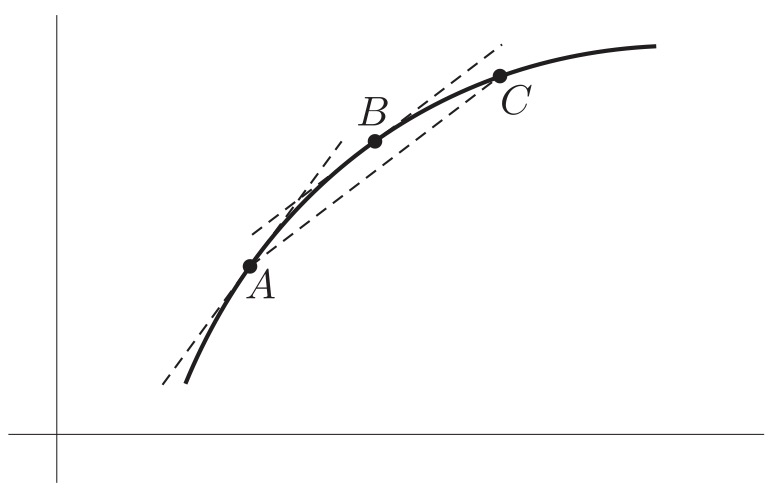

In [1]:
from IPython import display
Slope_at_Midpoint = "/9j/4AAQSkZJRgABAQAASABIAAD/4QBARXhpZgAATU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAAqACAAQAAAABAAADB6ADAAQAAAABAAAB6gAAAAD/4gJASUNDX1BST0ZJTEUAAQEAAAIwQURCRQIQAABtbnRyUkdCIFhZWiAH0AAIAAsAEwAzADthY3NwQVBQTAAAAABub25lAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUFEQkUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApjcHJ0AAAA/AAAADJkZXNjAAABMAAAAGt3dHB0AAABnAAAABRia3B0AAABsAAAABRyVFJDAAABxAAAAA5nVFJDAAAB1AAAAA5iVFJDAAAB5AAAAA5yWFlaAAAB9AAAABRnWFlaAAACCAAAABRiWFlaAAACHAAAABR0ZXh0AAAAAENvcHlyaWdodCAyMDAwIEFkb2JlIFN5c3RlbXMgSW5jb3Jwb3JhdGVkAAAAZGVzYwAAAAAAAAARQWRvYmUgUkdCICgxOTk4KQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAGN1cnYAAAAAAAAAAQIzAABjdXJ2AAAAAAAAAAECMwAAY3VydgAAAAAAAAABAjMAAFhZWiAAAAAAAACcGAAAT6UAAAT8WFlaIAAAAAAAADSNAACgLAAAD5VYWVogAAAAAAAAJjEAABAvAAC+nP/AABEIAeoDBwMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2wBDAAICAgICAgMCAgMFAwMDBQYFBQUFBggGBgYGBggKCAgICAgICgoKCgoKCgoMDAwMDAwODg4ODg8PDw8PDw8PDw//2wBDAQICAgQEBAcEBAcQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/3QAEADH/2gAMAwEAAhEDEQA/AP38ooooAKKKKACiiigAooqlp2padrFjBqmkXUV9Z3Kh4p4HWWKRT0ZXUlWHuDQBdooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//Q/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/0f38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK43xJrXi3TNc8N2WgeHv7Y03UrqSHU7oXUcLadAIXeOYROP3waRVQhWDLnIDduyoAKKKKACiiigAooooAKKKKACiiigAooooAKKz9S1bStHtzd6veQ2MA6yTyLEn/fTECvItc/aV/Z58N7hrfxL8OWzr1jOq2rS/wDftZC/6UAe20V8a6x/wUE/Y/0Qst18Rbadl7Wtpe3OT7GGB1/XFeX6r/wVM/ZQ04kWl7q+p472+nMufp57RUDsfo1RX5Ral/wV5+AEGV0rwr4luyO8kNnCp+hF05/SuJvv+CxXgWPP9mfDfUrj086+hh/9BjkoCx+ydFUtNvU1LTrXUYhtS6iSVRnOA6hh/OrtAgooooAKKKKACiiigAooooAKKKKACiiigAooooA//9L9/KKKKACiiigAooooAK8K/Zk/5IB4E/7BcP8AWvda8K/Zk/5IB4E/7BcP9aBnutFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorl7zxt4P07xVp/ga+1m0g8Q6tDLcWmnvMguZ4oOZHSPO4hfXHY+hwAJ408b+Evh14ZvvGPjjVYNF0bTk3z3Nw+1FHYDuzMeFVQWY4ABJAr5K+FXxY+Ov7RHxB03x14N05fBPwX01pGSTVLcPqfiQMjIrxRkg29uCQ6ODkkD74LInvXxN+Avw0+MWveGdd+I2nvrK+E5ZZ7Sylmc2EksoUb57bPlylNvy7hjkg5BxXsSIkaLHGoREAAAGAAOgAoAdRRRQAUUUUAFFY+u+IvD/hfTpNX8Tana6RYRffuLyZLeFfq8hVR+dfGHxE/4KNfso/D4y26eKX8T3kWf3GiQNdg/7s7eXbH8JaAPueivxF8U/wDBWvxX4kvzoXwN+F7Xl3JnyX1CSS7lf0/0OzCn8pjXM/2r/wAFYvj5/wAelteeCNLn9I7fQhGD3BlxffkWoHY/c/VNX0nQ7J9S1u9g0+0i+/NcSLFGv1dyAPzr5m8Z/tu/sp+BPMXWfiRplzLHkGPTmfUm3D+H/Q1lAP1Ix3xX5uaX/wAEqvjR4+vU1j46fFlJrk8uYvtWrznPUeddvBg+pww+tfTXgz/glJ+zL4d8uXxNLrPiqUY3rdXgtoSfZbRInA+shPvQGhzXi/8A4K4fATSN8PhLw7rniCZc7XeOGzt2+jvI8g/GKvBbn/gqn8d/HVw9p8HPhFBNITtVX+2au+e2VtVt+fav1O8Ifsn/ALNfgQRnw18NtEhlixsmns0u51x6TXIkkH/fVe+Wtpa2NulpZQpbwRDCRxqERR6BRgCgLo/C4fEn/grb8Uv+QB4cuvDME3VP7OsdMwD/ALWp/vRj2bNL/wAMef8ABSb4kfN46+KTaTBJ9+G4167K8+kNkjxE/iPrX7sUUBc/DjTv+CQfirWbgX3j34sI85+/5GnyXTt7ebNcRn8Sp+levaH/AMEg/gfa7W8Q+MPEOoMOot2tbVT+DQTHH0b8a/WmigLn56aP/wAEvv2R9MCi90TUdWx1+1alOufr9nMP6Yr1DSv2DP2RNGAFn8NbCTb/AM/Mtzdfn58z5r67ooC54Rpv7Lv7NukY+w/C3wyrDoz6RaSOP+BPGx/Wu3sfhN8K9Lx/ZvgzRbTHTydOto8f98xivQKKBDVVUUIgCqowAOAAKdRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9P9/KKKKACiiigAooooAK8K/Zk/5IB4E/7BcP8AWvda8K/Zk/5IB4E/7BcP9aBnutFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACisPxL4m8PeDdBvfFHivUYNJ0nTozLcXVzII4okHdmbj2A6k4A5r5s+B/7Qfi74+eM9Q1jwj4Qex+EtrA8dnr2oM9vdapeK6gPaWxXP2YKGBZ8EnHIYNGAC5+0D8T/jHoeqaT8L/gR4Pl1fxX4lhklXWb1CmiaTAjBJJriXnfKuQViAycg4bhGPgP8Asv8Ah74S3934/wDFeozeN/iZrQzqXiPUBumJYYMNqhyLeADgKvJGATtCqv1HRQAVz/ivxX4c8D+HNQ8XeLtQh0rR9Kiae5up22xxRr3PckngAZJJAAJIFHibxZ4X8FaRLr/jDV7TQ9Mg/wBZc3s6W8K/V5Cq59s1+Gv/AAUc/bN+FPxf+H9j8JPhFrc+rmPVI7vUbmKF4rOSKCOQLEHk2tJ+9ZX+VCh2ghuBQNI+r/8Ah7H+zN/wkv8AY32DX/7O8zy/7T+xxfZ8Z/1nl+f5+zv/AKvf/sV9r6t+0P8AA3QfBun/ABA1nxxpNloGrQC4s7mW6RftMZ/55Rk+Y7AggqqlgQQQCCK/jjr9Rv2HP2BNA/aR8G3PxO+Iut3+maJBfyWVtZ2UaRyXQhRGeUXEgcBNzlMCPOVb5gaBtH3F8Uf+Cs/wQ8L+dZ/DPRdQ8a3aZCzOP7Osj6EPKrTn6eQPrXzeP2kP+Ck37TI8v4R+E5fCuiXXCXNlZraxNGe/2/USVJHUmEqfQev6rfC79kP9nL4PeTP4K8D2CX8OCt9eIb27DD+JZrgyMhP+xtHoK+kqBH4ZaD/wS4+N/wATdQj8R/tFfFIvdP8AMyRvPq93g9UM9y0aIf8AdEgr7R+HX/BNL9lXwGIp9R0K58XXseD52sXLSLnv+4hEMJHsyN9a+/KKAucx4W8E+DfA1gNK8FaDYaBZjH7mwtYrWPjp8sSqK6eiigQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//1P38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApgkQuYgwLqASueQDnBI9Dg4+lfH/xu/aW1zRPGJ+BXwE0BvGXxSuIkkljcMmm6NBKoK3OoTcADDBljBy2RyCVV+l/Z/8A2er74WX2rfEP4heJ7vxp8R/FEaJq2qTSMlssaHeltaW4wkcMZPy/LnrgIp2AAf8AFP8AZk0L41fEnSPFPxM1y81nwjocKNbeFW2x6a9+rMTdXGzDTjaQBG+QCDyUZkP0pa2ttZW0VnZxJBbwIscccahERFGFVVGAABwAOAK+I/jv/wAFBf2evgebnSV1X/hLvEcGV/s7SGWYI47T3OfJjweGG5nH9yvzpuPjz+31+27cy6Z8G9Im8F+DpmMbXFk7WkITOCJtTk2ySMvRltwpI6xmgdj9bPjP+1j8BfgLHLD8QfFMEeqIuV0y0/0q/Y9QDBHkx57NKUU/3q/L7xh/wUo+Pnxq1uXwT+yf4Bngkk4W6kt/7S1AKeBIYlBt7cepk81R13CvXvgt/wAEoPh7oEkev/HbXJvGequ3mSWVoz21hvJy2+XIuJued2Ys91NfoT8HtV+BUcOteA/ge+kRQeErhLXULTSERI7e4ddwEnlgB2OCC+W+ZWUncrAAH4E/FH9nb4sG807xJ+1147vNS8Ya6dukeFNPlOsa/eO5wI40Um2tIS38a+YowQqMwCn9BP2Rf+Cefh3wf4c1vWvj34c0zUrzxPAsMGjzxreSaVBhgxN4cH7S4Yb2hCKhGUIzgfoNovwV+GXh/wCJOufF/TtDiHi/xAsaXWoSFpZRHHGsYSHeSIVZVG8Rhdx5bPGPU6Auflp/w6T/AGdf+El/tb+2vEH9leZ5n9nfaINmM58vzvI8zZ2678fx55r9IfC/hfwj8NfCNl4X8MWcGh+H9Dt9kMKfJDBCmWYlmP1ZmYkkksxJJNdVX5D+IfHOvft+ftB6h8EfCWoz2HwS8CuJfEFzaOY31qVHKpCZF58qSRWESg4KI8py3lhQD7O/4a38DeItXutC+Dug638UrmycxT3Hh+1jbTYZR/A+oXctvak45+SR8/nXV6L8e4U1zTvDXxM8H6z8PL7WJVt7GXVRaz2N1cP9yBLyxuLmFJnwdkcrRs54TceK9i8M+F/DvgvQbLwv4T06DSdJ06MRW9rbII4o0HZVH5k9SeTya4n44eD9I8ffB/xj4R1yJZbTUdKu1yw/1cixl4pV9GjkVXU9mUGgA+Gnxh8HfFu68Tr4GmbUNP8AC2onSpr9dptp7uONJJlgYEl1i3qrNgAn7pI5PqdfGH/BPzwB/wAK+/ZP8EW00fl3euwyazOcY3fb3MsJ/wC/HlD8K+z6BMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//1f38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK89+Jfg7SPGPh1rfW9b1XQLTT2a7e50jUrjTJgsaNu3y27IzIASSpyMgHGQK9Cr5P/bi+IH/AArf9lj4ga3FJ5d1fWB0u3wcMZNSYWpK+6pIz+23NAHw7+wL4W8bftDeHfGvxA+IHxG8bz6Jb6t/Z+jwp4k1CBkSNPNkMjRygu22WJc9MhuPT7Q8ffs06na+EtU1D4dfFHxpofiGyt5Z7Ke58QXeoWpmjUsizwXbSo0bEYbgHHOe1eUfsP8AizwL8I/2Y/BvhrUrfWU1K6hl1G7MXh/V5laW9kaZcSRWjI4ETIoZWIIAIJqX41ftF698YGvf2df2e7c6Z4n8RwPbXGqeI92hLa2kwKSvaWl4I765lK7lBityEzuySMAH1Oj/AOCf/wC034p/aU+FWo3fjyONvEnhm7WzubqFBHHdxyIHimKLhUkPzB1UBcgMAN20feNfOn7L/wCzl4Z/Zj+GEHgDQbhtRvJ5Wu9Sv3XY11duqqzBcnZGqqFRMnAGSSxYn6LoBhRRRQIzdY1nSfD2lXWua9ew6dp1jG01xc3EixQxRoMs7uxCqoHUk14n8EP2hPDvx9m8Q3/gjSNRXwzo06W9prd1D5Nnqj/MJTaBiJGWJlwWKjqOh4r89v2xfiH4F0r4l6hH+0r42j8QeEdElil0P4feHGYT30oRX87W5CQIwrkhUL8qAyKPmV/nGLxv+2j+3dGvg74S6Mnw++F0AFqI7MtY6XFbp8oimulUPcbRwYoU24xmIdaB2P0Z+P3/AAUB/Z5+BF3f2ekSx+MvGDARy2mlFCqtFnYl1eAFFCEsNo8x1JOUGa/PVtd/b5/4KAyNDosbeC/h3dkqWQyafprxHgh5ebi946hd0e4fdSvuv9nv/gmn8EPhCLbXfHUY8f8AiWLD+ZfRgafC45/dWmWVsf3pS/qAp4r9GI444Y0hhQJGgCqqjAAHAAA6AUAfnB8Bv+CZPwJ+FYt9Y8exn4g6/Hhi1+gTT43H/POzBZXH/XZpAeoC1+jVraWtjbRWVjClvbwKEjjjUIiIowFVRgAAdAK8R+On7Q/w9+AWiQXviuaS91jU28rS9GsV8/UdRnJ2rHBCOcbiAXOFGQM7ioN34Fa98Z/FHg+bxD8bdBsfDGp6hdPNZaZaSvNLaWDKvlR3bN8puAdxYrgYIBVSCoAPnn4kab+0V+0Z451n4V6VDefCr4W6PObXU9ZJUatrq4BaPT9pYRW7qeZc5IODk74R9WfC/wCFXgH4NeEbXwP8ONHh0fSbXnZGMvLIQA0s0hy0kjY5ZiT0HQAD0OigQUUUUAfNP7YvjrUPhv8Asx/ETxbpMhhvYNMa2gkU4aOS+dLRZFPZkMu4e4r5t/4JXeAbXwv+zFF4uEYF54y1K7u3kx8xhtXNnGn0VonYe7mvrv8AaP8AhfP8aPgZ4z+GVm6pea3YOlqXOE+1Qss1vuPZTKi5PYc18tf8E1vHdnefAZfg5q6nTvF/w3vb2w1LTpx5dzGstzJOkjRnkLmRoyf7yHPbIPofolUFy9ssRW8ZBFIRGRIRtYyHaF54O4nAHcnFTEhQWY4A5JNfOJ1GD44+PdIfQH+0+BPBF6b6a+XmDVNYgDRwQW7dJIbNmaWWVcqZ1jRSSkoUEfRUEEFrBHa20awwwqEREAVVVRgKoHAAHAAqWiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//W/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr8nv+CoOpXnjD/hUf7PGjSkXnjjxAkjhOqrGUtYiw/ul7lm9Pkyelfp/4sv8AxJpnh+7vvCOkxa7q8QXyLKa6+xRzEuAwacxy7MKS33DkjHGc1+ZPjH4M/tWePP2rPCf7R3iHwLor6b4Otvs9noieIO6rMVla5NpjeJZvM4iHCKvbNA0fqVpmnWej6baaRp0YhtLGKOCFB0SOJQqqPoABX5lf8FYD4ctf2f8AQ9VvGWHxFa6/bHSJkO24jfy5GmMbD5gu1QWxxuCE8ha+q7nx9+1I0LJY/CLRknYYVpvFWY1PqwXTtxA9BjPrXh1t+yB44+MvxN074tftdeILHXhoRzpXhfR0kGjWnIbMsk+JJyxALgqN5UBmaMCMAI+qP2fNX8W6/wDAzwDrfjvefEF/olhNetIMSPM8CkvIOztncw4wxIwK9hqlqGoafo+n3GqarcxWNjZRtNNPM6xRRRRjczu7EKqqASSSABya/JX9oT/gqP4Z0sv4K/ZqsG8WeIrmQ2yajLC/2OOQtsH2eHiS5cn7vCpyCN4ytAH0B+1p+3j8P/2dIZ/Cfh5ofEnj11wtiH/0axLDIkvXTleORCv7xhj7gYNX5P8Agn9pz9uH4+yav8M/hNqmqaxqHiK5+1ahewqkJs0dQnlwTYVNPtQFA4cMzDcGVnZT7Z8B/wDgmr8RPi9r8/xZ/ajvZdDi1q5k1CfTIFji1G7lncyO0+xRHaq7HJRVMnJGIzg1+2fw9+G3gT4U+Grfwh8O9EttB0m2+7DbJt3NjBeRzl5HOOXclj3JoGfmt+zt/wAEufAvg+WHxh8f7xfG/iJ285rBS/8AZkUhO4+YWxJdNnkl9qHJBRutfqtp+n2Gk2UGmaXbRWdnaoscMMKLHHGijCqiKAFAHQAYFW6RiFUseg54GaCbi1Vs76y1CIz2FxHcxK7xlonDqHiYo6kqSNysCrDqCCDyK/PPVviR8Y/2wNUvPB3wHkuvAXwttpXttU8YTxNDf6jsYrJBpUT7XQZBVpmwQc/dI2P9mfCX4SeB/gl4Is/h/wDD6yaz0u0LSEyOZZp5pOZJppG5aRyMk8DsAFAAAPOvhz+zJ4G8C/ETXfi9q11d+LvGutXEzpqurus01jaux8u1tFACQxxodmVAYjIyFO0fR9FFABRRRQAUUUUAFeA/Eb9mn4WfEnxND48u7a70DxhbKEj13Q7uXTdSCAY2vLCQJRgAYlVxjjpxXv1FAHzrbfs2+HbpRbeOfFnifxxYDrZazqhazkA7TW9qlvHOvqkyup7g19A2VlZ6bZwafp0Edra2yLHFFEoSONEGFVVXAVQBgADAFWaKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/1/38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorx/Xvjf4K0H4veHPgg/2m+8UeI7a4vRFaxealnbQDImu2BHlJIQVQ4OWGDjIJ9goAKKKqX9xJaWNxdQxmaSGN3VB1YqCQv49KAPFPir+018B/gjew6Z8T/GVnot/OodbXElxchG6O0NukkiqezMoB5weK858bft0/sx+Dfh4PiLF4ztNdtp9yWtlpziW/uJVGTGLdirxEZGWlCKARk8jP8sXjTxh4h+IHizVvGviu7e+1fWrmS6uZnJJaSQ5IGeir91VHCqABwBXuX7HXw48L/Fr9pPwT4A8aWEmp6Hqc9wbq3jkaIulvayzgM6YYJuQb8EErkAgnNBXKfZOseKf2tv+Cl/iV9D8MWZ8K/DOznAkTe6abFtIYNcz4DXlwOCI1XapwQkeWc/q9+zR+xT8Hv2arOK/0a0/t3xYU2z63eopnyRhlt05W3Q8jC5Yjh3avqfw94d0Hwnotn4c8MafBpWlafGIre1tY1ihiQdFRFAAFbNAmwooqpfpfSWNzHpkscN40biGSVDJGkpU7GdFZCyg4JAZSRxkdaBHk3xr+PHw5+AfhgeJfH9+Y3uGMVjYW6+bfX8/GIraEHLsSQCeFXI3MBXS/C7xZ4i8deA9I8WeKvDFz4O1PUo2lk0q7kWSe3G4hA7JjBZAG2kKy52soIIr5++DH7LA8M+Kn+Mvxv1n/hYXxTuh/wAhCZcWWmJziDTbcgLEq5I37Qx5ICbmB+wKBjURI1CRqFUdgMDmnUUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/Q/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKwPFeoa3pPhnVdT8NaZ/bWr2trNLZ2PmrD9puEQmOLzHIVA7YBY8DOavaxrGl+H9Jvdd1y6jsdO06GS4ubiZgkcUMSlnd2PAVVBJNeTfAX4zW/x58DP8QtM0K80TSLi9uoNOe82hr60gfZHdoo+ZEl5+VgCCDgsMMQDzP9lj4IeIfAlhrHxX+Lci6h8VfiC63mtT8MLOLrDp8ByQsUC4BCnBYYyyohr62or5o/aU/aq+GP7Mfhj+1vGNz9s1q7Rjp+j27D7XdsOAcc+XED96VhgdAGbCkA9l8ffELwX8LvCt7418f6vBoui2C7pbidsDJ6IijLO7dFRQWY8AE1+HHxW/ag/aC/bv8YXHwS/Zo0q60fwe/wAt3OW8mWe3Y7TLf3C5EEBGcQqSX5B8wkIMXwd8MP2kf+ClnjiP4h/E6+k8MfDSwmYW3lqVt0QHDQ6fC3EspxtkuHyAc5J2iKv3F+Evwd+HfwP8H2/gj4baRHpWmw/M5HzTXEuMGWeU/NJI3qegwAAoAAPY/H7Xv+CO+pjQ9Lbwx8RIW1gRAagl5ZsLZpiSSbd42LqgGFw6ktjdlc7R9pfsffsGeEv2YL658Zarqv8Awk/jG7hNuLryfJt7SFyC6QRlmYs+AGkY5IGAqgtu+/aKAuFVNQ1Cw0mxuNU1S5js7O0jaWaeZxHFFGgyzu7EBVAGSScAV5v8XvjP8OvgZ4Rm8Z/EjVU06yUlIYx89xdTYyIbeIfNJIfQcAcsQoJHWIugfELwcg1CwN1o3iOxBltL6Bo2e3uo8mOeCUBlJVsMjAEHIIzQI+Fdc+NXxV/at1e78AfssTP4c8D20jW+r+PZ42AfHEkGkRttMkmODLxt6gp8jt9z+B/CsXgfwfo/g+DULzVY9GtYrVbu/l8+7mES7Q8smBuY45OBWroehaL4Z0ez8P8Ah2xh0zTNPjWG3traNYoYo14CoigAAegFatABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/0f38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK8g8Z/G7wT4I+I/g/4Uagbi88S+NZJRaWtnF5zQwQozPc3ABBjgBXbvwecnG1XKgHz1+0T4S+I37QXxN0X9nuHT73RfhfbxRav4p1fBjTU41k/c6XbSDuzrul6EDB42gSfa2l6Xp2iabaaNo9tHZ2FhEkFvBEoSOKKJQqIijgKqgAAdBV6vyG/bK/b/vdP1WX4C/sxO+seL76X7FdapZL55t5nOz7NZBQ3mXBPylwCI+i5k5jBns/7ZP7fHhL9ni3uPA3gfyfEPxDlTHkZ322m7x8r3RUgl8HKwghiMFiqld3yf+zP+wp48+Ovij/hob9sO5u7w6m63MGk3TFLm8HVGugNpgtwMBIFCkjAIRAFf2/9jL/gnzZ/De5t/jD8e1XXfHtw/wBqgs5m+0Q6dK53+bKxLCe6ycl8lUbldzAOP1ToC5T07TtP0iwt9K0m2isrKzjWKGCFFjiijQYVERQAqqBgADAFXKKinngtYJLm5kWGGFS7u5CqqqMlmJ4AA5JNAiWuM+ImqeM9F8Eazqvw80aLxD4ktrdnsLCe4FrHcTdlaVuF9cEjONu5c7h8ZeIf2iPiV+0D4oufhr+x+IotK0+YRaz47u4RLptptILw6fGw23UxHflccj5WEo++7dZkgjS4cSyqoDuq7QzAckLk4BPbJx60AfGPwh/Zc1VvF0Pxx/aV1WPxz8SiA1rFt/4lOhJnIhsIG43Kf+WrDdnkfNl2+06KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/0v38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooqvd3drYWs19fTJb21sjSSyyMEREQZZmY4AAAySeAKAOG+K3xE034TfDrxB8RtWtLi/tdBtXuWt7SNpZpSOFRQoONzEAsRtQZZiFBNfJPwM8Lf8ACrPD/in9r79qO/h0rxl4rhW4vXuMiLQ9KJX7NpsKnLBvuB1UFnk2phnBLdt4s/bm/Z98N+CdG8aadq83iH/hI5JI9M0/T7d2v7oQStFNKsMvllYY2R8yPhDtO0seK/Nf9qH9qjx7+2R42j/Zg/ZgtJbzw9eyhLy8UFDqAiYFndyP3NlEQGLHBcgZ4IVgaRwv7Rf7bHxc/a78VJ8Cv2d9NvbHw9q8htVhh+XUNVU/eNwwOIbbbksm4DZkysV+Vf0s/Y1/Yb8I/s06VF4o8ReTrvxCvIsT323dDZK4+aCzDAEDHDykBn5+6p213f7Jn7IPgX9l3wp5dkE1bxfqUajU9XZMM/QmCAHmOBT0HVyAz8hQv15QDYUUV5F8bfiVrvws8DyeIvC/hHUPG2sXFxFZ2enaeuS1xcEiNp358qAEfPJg7cjjnIBHZeMPHXgz4f6bDrHjjWrTQrK4uIrWOa8mWFHnnbaiKWIySfyAJOACRj/FP4YeFfjH4Ivvh741W4fRtSaI3CW1xJbPIsUiybC8ZBKNt2svQgnvgj5d+GP7MPifxb4utfjh+1jfw+K/GcJ8zTNFi50TQFJBCQRElZZlwN0rZ+YAguyrJX3LQBz/AIV8KeGvA/h+y8KeENNg0jSNOjEVva2yCOKNR6AdyeSTySSSSSTXQUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/0/38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiuf8AFPivw34I8P3virxfqUGkaRpsZluLq5cRxRqPUnuTwAOSSAASQKAOgr8xf2yvGvxF+OGrav8AsqfAie3tl0y0jvvGus3c/wBmsrCykIZLSSfBwXQmWYDkxqVGR5gFu1/aH8f/ALR3xM8O6V8P9fj+FXw2M0l/balqIjj1jxRFpjLJOLC2nGEtAB+8dhymc5AkjX48/ae/aK8ZfthfFFv2av2XbXzdE1CZY9T1GAeV/av2Y4Ms8wGVsYOoLZ3nBAOUUhSR8nr4buPif41g/Z5/ZiSbxNd3qrb6t4muFMT30MG1W2DkWWlQADZEPmkwu/cfKjX+gH9lr9lfwJ+y/wCCF0PQEXUNfv1RtV1Z0CzXUo/hXqUhQk7IweOrZYkl/wCy1+y54I/Zf8CL4e0BVv8AXb8JJq2qum2W7mUfdXukKZIjjzxyTlixP09QJsKRmVFLuQFUZJPAAFNeWKNkSRwrSHagJwWbBbA9TgE/QGvEfjx8GJ/jn4ZsfBdx4r1Hw1obXSyatBppRJNTswrBrR5SN8asxUsVJBXKspyCoI8j/wCGp9U+I/xZtPhn+zhoMXjPT9IvI18TeIZpWi0ixtw37yG3nQHz7krnbtyuccMNxT7NrkfA3gPwd8NPC9l4M8B6TBoui6eu2G2t12qPVmJyzux5Z2JZjySTXXUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//U/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorwT4/eNPjF4W0DTdL+B/hD/AISbxL4huTZxXNxIsenaWNhY3N5yHKAA7QowSME7iiOAdv4w+LPw48Aa74e8MeMNfttM1bxVdJZ6ZayMTNczOcKFRQSF3YXe2FDEKTkgHz79puw+B4+F9x4s+P8Ap8OpeGfCU8eqrDMTiS6hDJDGEDKJWkZ9gibKOSAwxXJ/A79l7SPhnrFz8VfiXq7+O/ijqaFr7X74DbbqRzDYxH5beFQSo2gEjI+VSEH5+/8ABQr9qjT/AInzWX7K3wPtoPF+patdWxvLu2RLsC43BoLeycbl87JBklQ/IPkByX2gz4I8V/E74sftO/Fq70fwZp7y+K/G+3TIra24j03Ro/8AV6bAcARQqg33cvy7uVIVPNEn78fsk/soeEP2XPAo0uy8vUvFWqKj6vqm3DTSDkQxZ5WCMn5R1Y/M3JwOO/Yo/Y60L9mLwb/aWsrFqHj7W4l/tK9X5lt0OGFpbt2jU43sOZGGT8oQL9x0A2FfP/x9/aF8M/AfSdNS60+78ReKPEcj22h6Hp8bSXeo3KAZVSAQiLuXe5BwDwrHg5mh/tPeCfGfxpPwZ+Hlld+KpNOjlbWdXsVV9L0qRFJjhmnJCvI7ArtjzhuOSHCfRclpaTTw3U0KPNb7vKdlBZN4w20nkZHBx1FAHxL8KvgJ8T/HHjvTPj9+1Dqxk8R6YzTaF4Z06Zk0vQhICMsUb/SLkqdrsSV6jLjbs+4qKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//V/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsrXNc0bwzpF34g8RX0OmaZYRtNcXNzIsUMUa8lndiAoHqTWrXgnxm/Z48HfHjU/Db/ABBvb+50Hw/LJcSaJFOYtP1CY7fKa7RRukERBKgMB8xB4JBAPKPhp+0L8R/2gPiZaXnwe8PR23we0mSZL/xDqySRS6vIFZFTTIeDsSTBaRxg4IOwja32lVPT9PsNJsbfS9LtorOztI1ihghRY4oo0GFREUAKqgYAAwBXyd+2N+1VoH7L/wAOH1NDFe+L9ZV4dGsGOd0gGGuJQOfJhyC3Tc2EBGSwAPj/AP4KX/tdSeEtKl/Zw+Gl0W8Ra5Eq63PAcva2k4G20Xbz51wpBYdREQMHzAV9F/4J9/sUQfA7QIfit8SbJX8f6xD+5gkAP9k2so/1YB6XEin963VR+7GPnLeI/wDBPj9kzV/Fmuv+1v8AHeN7/VdYuJNQ0aC6X5pZpnMjalKuMZZiTAMYH+sA/wBWa/Sv47ftF/D/AOAekW03iSSXUtf1ZvK0nQ7BfP1LUZ2O1UhhXJ27uC5+UdBliFIV5HvdfMX7QPwo+LnxkvdH8E+HfGKeEPh9dRynxC9krLrN0ARstoJTlI4pVLB24YYwQ6sVrA+BPhf9ovxJ4vn+NPx31tvD6Xtq9tpvguwdWs7C3lZXD3khB866+UfMuNvIyAxjX68oJOB+Gnww8CfCDwlaeB/h1pEOjaRZj5Yoh80jkYaSVzlpJGx8zsST64ArvqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9b9/KKKKACiiigAooooAK8K/Zk/5IB4E/7BcP8AWvda8K/Zk/5IB4E/7BcP9aBnutFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKq399ZaXY3Gp6lOlraWkbzTTSsEjjjjBZ3djwFUAkk8AUAecfGX4veDvgZ8O9W+JPji48nTtMT5Y1x5tzO3EUEKn70kjcDsBlmIUEj8Tv2b/hJ41/b++PWqftF/HCFj4J0m4VI7QkmCcwndBp0Gf8AlhCCGnbq5Y5+aRmXP+Jfizxr/wAFLP2l7L4aeApprH4Z+F5Gf7TtIRLZW2zX8qnrNN9y3RuQCAQuZTX6N+MPhL8aL+bTP2Z/gtCnwt+EGiWEC3niG2mWTU76OTPmW1mo+aKVm3GaZ/mJO/PO2QKPpzwr8afhZ4p+IWs/CHwfq8V/rvhe2jmvYLVGaC2Qv5QiMyjyhIhwDGG3L6cMB0cvw18Az+PYvijPoNpL4sgtPsEepNGGuI7YMzbEY/d5ZuRzgkZxxWR8JPg58O/gd4Rg8FfDfSY9MsI/mlf709zLjDTXEp+aSRvU9BwoCgAen0EhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//X/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPi79sL9svwt+ypoenwNp51/xXriu1jp4k8pFiQ7WnnkwxWMNwoAy5BAwAzL+Knx3/4KOfGv47/Du9+Gupadpvh7TtSlU3UmmCdZp7dOfs7tLLJ8jNgvtALAbT8pYH2L/grx4T1XT/jd4U8ZzyiTTtZ0MWkC7huSWxuJGlXbnIXFwjA4wSWHavym03TdQ1nULbSdJtpLy+vZUhgghUvJLLIQqIirkszEgADkmgtI/pI/4Jo/BH4i/CT4WX2s+NLaw06y8Xi1vrO2iQSagybGKzXVwrFdro6+XCMiNeTh2k3fpXXk/wACPCGs+APgp4E8EeIW3apoWiafZ3WDuCzQQIjoCOoUgqD3ArB8J/tC+BfGvxu8VfArw+ZbnWPB9nDdX1wNptw8jhXgUg5Lxbk38YBJXqpFBLPdqKKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//9D9/KKKKACiiigAooooAK8K/Zk/5IB4E/7BcP8AWvda8K/Zk/5IB4E/7BcP9aBnutFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArlPHPjbw18N/B+r+O/GN6un6Nolu9zczN/CiDoo6s7HCoo5ZiFAJIFdXX4Wf8FAfjF4n/AGh/jJoX7HfwZka9S3vkj1PymxFcal18uRhn9zZJueU9A+4sMxKQDRwnwV8G+KP+CjP7Ueq/GL4lWrxfD3wzIg+xsT5XkIS1ppqN3LcyXDL1y33fMTH7M/D/APZk+AHws1s+JPAHgXTNI1XnbdJD5k0e7g+W8hYx5HB2EZHHStP4C/Bfwx8Afhbovwy8LKGi06Pdc3BUK93dyYM07+7t0GTtUKoOFFevySJEjSysERASzE4AA6kn0oBs8h+NPjzVvBvhq20rweiXPjLxVcLpWhQONy/a5VLNcSr18i1iV55f9lNv3mXP5T/smeF4/g3/AMFIfiN8NUvJ79ZdFnjNxdOXnuZpRZXzTyMeryEu57ZY44r7u+F/xH+HvxE8d6t8c/EHijS4LONZtH8L2097AjQ6akg+03pRnBWS/mQFcgEW8cXTcwPxLPruiW3/AAVw0XWtC1G3v7HxNp2x5rWVJoyw0mWELuQkZ3wKMZoGftLRRRQSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//0f38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKzNb1S20TRr/Wr2eK1t7C3luJJZ22QxpEhdnkbnaigZY44HNAHwF+37+2K37OXhC38IeBLmNviB4iXfBuCyCwsw2HuXQ8FnIKRA8E7m5CYby7/AIJj/sz3Pg7wpcftD+PoXl8UeNI2On/aMtLBp0jbzOS3PmXbfPnk+WFOfnYV+eP7Ofww8X/t0/tU6l4x+JFydU0WzuRqWuXKB1gaBG221lCGwyJLtEaKcMsSufvLX9NUEEFrBHbW0axQxKEREAVVVRgAAcAAcACgpktfM3xn1xfH/ibTv2bPDt75d54hga+8RvDJtls/D0TKkygjlZL52W2j7hGlkHKDPvfifw/beKtBvfD15dXllDfJsaawupbK6QZBzHPAyyRnjqrA4yK+ZvC/7E3wO8GeOI/iR4cGuWfiQSLJNfDXdRM1zhlYpcMZiZY3KgOj5VgMEGgSPYU+BPwQjRY0+Hvh0KoAA/sm06D/ALZV+U/7TPhfwx8Kv+ChvwE1bwjpNnoVhqn9m2rw2NvHbRNLJfzW7uUjVV3FJlBOOgFftPcwLdW0ts7OizIyFo2KOAwxlWXBUjsRyDXxzr37Bv7P/ivW7fxP4sXX9c1q02eRf33iDUri6i8tt6eXK85Zdrcrg8HkUAmfZtFch4I8GWPgPQxoOn6hqepxCR5fO1bULjUrnL448+5eSTaMcLnA7dTXX0CCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//S/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCjqmp6domm3es6vcx2djYxPPcTysEjiiiUs7ux4CqoJJPQV+A37Wv7eXjD4y+DdQ+EXgPRDYaX4y1FY9NmiaQ39/o8beUokhx8hu7lTsAO4xqUZMMHf9Cf28I/FmpeFLTTNalGj/B6xhl1TxdqENwqXl4ls6/ZtIt0yGDXcpVd4yMkZIClX+FP+CdHwcv/AI4/GbWv2o/HNhHFpHh64EOkWyJttlvVjVIY4VPAhsLfYkY7ExkHKGgpH6hfsefs8WX7N3wW0vwfLGjeIb/F9rU64O+9lUZjDDqkK4jTscFsAsa+p6KKCQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9P9/KKKKACiiigAooooAK8K/Zk/5IB4E/7BcP8AWvda8K/Zk/5IB4E/7BcP9aBnutFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAK+fPjH8f9N+FvirwX8PdJ0ibxR4v8b36W9rpdrIscsVmp/0m9lZgQsUKgn5sBiDyArFfavEWp3WiaBqWs2OnTavc2NtNPHZ223z7l40LLFHvKrvcjauSBk1+bWh3WsfAD4ZeOv24P2hrdW+J3im2CWGmy5A0u2lOLDSolOGUs217jHzAAlhuVywNHzt/wUd+KfiH42fF/wAK/sefC5vtcyXkD6iEPySajcDEMTkdI7aJjJIeQC2Tgx1+vPwa+Ffh74KfDLw/8MfDCD7FodssRk2hWnmPzTTuB/FLIWc+mcDgCvyp/wCCXfwX1bxRrXib9rX4ibr3VdZubq30yaYZaSWZy1/eD3ZiYVI/6aj0r9pKAYUUUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//U/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKhuLiC0gkurqRYYYVLu7kKqKoyWYngADkk9Kmr4Y/adf4hfGfxtpH7KfgeC90fQ9bthqPi3XxE8cUejh9hs7aVhtea4YbWC5wvBBUyBQD6G+Cvxr8LfHjw3qHi/wXa3iaNaajc6fb3dzEIor4WzbTcWx3EvCx4DEKcgggEGvyD/b68ba/wDtM/tL+Ef2SPh1P5ltpN2iXjL80f8AaM67ppXA6rZW2SccgmVeor9TvjH478Hfsm/s66nr+iWUNjp/hXT0s9IsV4R7lgIrWLHVgXIMh5baGY55Nfnr/wAErvgzqOqv4o/am8db7zVvENxcWenTzDLyb5N99dZPUyS/uwwwRtkHRqBo/WrwB4H8P/DXwVongHwtB9n0nQbSK0t17lIlxuYjGXc5Zj3YknrXX0UUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9X9/KKKKACiiigAooooAK8K/Zk/5IB4E/7BcP8AWvda8K/Zk/5IB4E/7BcP9aBnutFFFAgooooAKKKKACiiigAooooAKKKKACiiuM+Inj3w38LvA+tfELxdObfSNBtnubhlG5yq9FRe7uxCqO7ECgDH8afF3wF8P/E/hPwb4m1Ew6z41u2stMtY4nmllkRdzOyxhisa8BpCNqlhuIGSPS6+Ff2Xvh14r8deKNQ/a5+NNobfxV4rh8nw/pknzDQtCOTDGoOMTTqd8jYBwT90u619R/F74laN8Hvhl4k+JmvkGz8PWUlzsztMsoG2KEH+9LIVRfdhQB+On/BRfxzr3x7/AGgPBX7I3w+l837HdQNebclP7RvV+UyAfw2tsxdiOgdwfu1+z/w78CaD8MfAuhfD7wxF5Wl+H7OKzgB+8yxLgu2Orucsx7sSa/Hj/gmB8NNa+JHxE8bftaePwbq/uLq5tbKVx9++vD5t7MgPQIjrEuOMO6/w1+3VA2FFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/1v38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAQkKCzHAHJJrjfCPjXwN8UvDj654O1S08RaJO89q8sDCaF2iYxyxt2PIIIPBBBGQQT8gftO+PfFHxP8ZWf7H3wcvGtdc8QwC48U6rF8w0XQ2wJBkdJ7lTtRc52sOgkDr9g/D/AMBeF/hh4M0jwD4Ls1sNG0SBbe3iHJwOSzn+J3YlnY8sxJPJoGdjX4wf8FWPixqes3Xg39mHwZuutT124hv72CI/PI0khgsLf3LyF3KnusZ71+zU8yW8ElxIGKRKWO1S7YUZOFUEk+gAJPavwk/ZF8N6/wDtPftz+NP2gvHOnz2tj4RuHuorW7jZHguHzb6bbujYIaGFC59HjBI+agEfsD8BPhPpvwP+EHhf4X6Ztb+xLREuJVGBNdyZkuJfX55WZhnoCB2r1+iigQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//1/38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAwrHwv4b0zW9S8S6bpdra6trCwre3cUKJPci3BEXnSKAz7AxC7icA4HFbtFFABUKW9vHNJcRxKss2N7hQGbbwNx6nHbNTUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//Q/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/0f38ooooAKKKKACiiigArwr9mT/kgHgT/sFw/wBa91rwr9mT/kgHgT/sFw/1oGe60UUUCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9L9/K8Pn+EPi2aaSVPi74thV2LBEXRNqgnO0btLJwOgySfevcKKAPCv+FO+L/8AosPi/wD750P/AOVVH/CnfF//AEWHxf8A986H/wDKqvdaKB3PCv8AhTvi/wD6LD4v/wC+dD/+VVH/AAp3xf8A9Fh8X/8AfOh//KqvdaKAueFf8Kd8X/8ARYfF/wD3zof/AMqq8Z/Z4+FXinUfgj4Mvrf4qeKdOjm06Jlt7ddH8mIHPyp5umyPgf7TE+9fbdeFfsyf8kA8Cf8AYLh/rQFw/wCFO+L/APosPi//AL50P/5VUf8ACnfF/wD0WHxf/wB86H/8qq91ooC54V/wp3xf/wBFh8X/APfOh/8Ayqo/4U74v/6LD4v/AO+dD/8AlVXutFAXPCv+FO+L/wDosPi//vnQ/wD5VUf8Kd8X/wDRYfF//fOh/wDyqr3WigLnhX/CnfF//RYfF/8A3zof/wAqqP8AhTvi/wD6LD4v/wC+dD/+VVe60UBc8K/4U74v/wCiw+L/APvnQ/8A5VUf8Kd8X/8ARYfF/wD3zof/AMqq91ooC54V/wAKd8X/APRYfF//AHzof/yqo/4U74v/AOiw+L/++dD/APlVXutFAXPCv+FO+L/+iw+L/wDvnQ//AJVUf8Kd8X/9Fh8X/wDfOh//ACqr3WigLnhX/CnfF/8A0WHxf/3zof8A8qqP+FO+L/8AosPi/wD750P/AOVVe60UBc8K/wCFO+L/APosPi//AL50P/5VUf8ACnfF/wD0WHxf/wB86H/8qq91ooC54V/wp3xf/wBFh8X/APfOh/8Ayqo/4U74v/6LD4v/AO+dD/8AlVXutFAXPCv+FO+L/wDosPi//vnQ/wD5VUf8Kd8X/wDRYfF//fOh/wDyqr3WigLnhX/CnfF//RYfF/8A3zof/wAqqP8AhTvi/wD6LD4v/wC+dD/+VVe60UBc8K/4U74v/wCiw+L/APvnQ/8A5VUf8Kd8X/8ARYfF/wD3zof/AMqq91ooC54V/wAKd8X/APRYfF//AHzof/yqo/4U74v/AOiw+L/++dD/APlVXutFAXPCv+FO+L/+iw+L/wDvnQ//AJVUf8Kd8X/9Fh8X/wDfOh//ACqr3WigLnhX/CnfF/8A0WHxf/3zof8A8qqP+FO+L/8AosPi/wD750P/AOVVe60UBc8K/wCFO+L/APosPi//AL50P/5VUf8ACnfF/wD0WHxf/wB86H/8qq91ooC54V/wp3xf/wBFh8X/APfOh/8Ayqo/4U74v/6LD4v/AO+dD/8AlVXutFAXPCv+FO+L/wDosPi//vnQ/wD5VUf8Kd8X/wDRYfF//fOh/wDyqr3WigLnhX/CnfF//RYfF/8A3zof/wAqqP8AhTvi/wD6LD4v/wC+dD/+VVe60UBc8K/4U74v/wCiw+L/APvnQ/8A5VUf8Kd8X/8ARYfF/wD3zof/AMqq91ooC54V/wAKd8X/APRYfF//AHzof/yqo/4U74v/AOiw+L/++dD/APlVXutFAXPCv+FO+L/+iw+L/wDvnQ//AJVUf8Kd8X/9Fh8X/wDfOh//ACqr3WigLnhX/CnfF/8A0WHxf/3zof8A8qqP+FO+L/8AosPi/wD750P/AOVVe60UBc8K/wCFO+L/APosPi//AL50P/5VUf8ACnfF/wD0WHxf/wB86H/8qq91ooC54V/wp3xf/wBFh8X/APfOh/8Ayqo/4U74v/6LD4v/AO+dD/8AlVXutFAXPCv+FO+L/wDosPi//vnQ/wD5VUf8Kd8X/wDRYfF//fOh/wDyqr3WigLnhX/CnfF//RYfF/8A3zof/wAqqP8AhTvi/wD6LD4v/wC+dD/+VVe60UBc8K/4U74v/wCiw+L/APvnQ/8A5VUf8Kd8X/8ARYfF/wD3zof/AMqq91ooC54V/wAKd8X/APRYfF//AHzof/yqo/4U74v/AOiw+L/++dD/APlVXutFAXPCv+FO+L/+iw+L/wDvnQ//AJVUf8Kd8X/9Fh8X/wDfOh//ACqr3WigLnhX/CnfF/8A0WHxf/3zof8A8qqP+FO+L/8AosPi/wD750P/AOVVe60UBc8K/wCFO+L/APosPi//AL50P/5VUf8ACnfF/wD0WHxf/wB86H/8qq91ooC54V/wp3xf/wBFh8X/APfOh/8Ayqo/4U74v/6LD4v/AO+dD/8AlVXutFAXPCv+FO+L/wDosPi//vnQ/wD5VUf8Kd8X/wDRYfF//fOh/wDyqr3WigLnhX/CnfF//RYfF/8A3zof/wAqqP8AhTvi/wD6LD4v/wC+dD/+VVe60UBc8K/4U74v/wCiw+L/APvnQ/8A5VUf8Kd8X/8ARYfF/wD3zof/AMqq91ooC54V/wAKd8X/APRYfF//AHzof/yqo/4U74v/AOiw+L/++dD/APlVXutFAXPCv+FO+L/+iw+L/wDvnQ//AJVUf8Kd8X/9Fh8X/wDfOh//ACqr3WigLnhX/CnfF/8A0WHxf/3zof8A8qqP+FO+L/8AosPi/wD750P/AOVVe60UBc8K/wCFO+L/APosPi//AL50P/5VUf8ACnfF/wD0WHxf/wB86H/8qq91ooC54V/wp3xf/wBFh8X/APfOh/8Ayqo/4U74v/6LD4v/AO+dD/8AlVXutFAXPCv+FO+L/wDosPi//vnQ/wD5VUf8Kd8X/wDRYfF//fOh/wDyqr3WigLnhX/CnfF//RYfF/8A3zof/wAqq7jwX4M1jwm922q+MtY8Vi5CBBqosAINmcmP7FaWx+bPzb93QYxznvaKBXCiiigD/9P9/KKKKACiiigAooooAK8K/Zk/5IB4E/7BcP8AWvda8K/Zk/5IB4E/7BcP9aBnutFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/U/fyiiigAooooAKKKKACvCv2ZP+SAeBP+wXD/AFr3WvCv2ZP+SAeBP+wXD/WgZ7rRRRQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/1f38ooooAKKKKACiiigArlvBHhDS/APhLSvBmiPK9ho8C28LTMGkKL03FQoJ+gFdTRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/9k="
display.HTML(f'<center><figure style="width:600px"><img width="400" src="data:image/png;base64,{Slope_at_Midpoint}" /><figcaption">The derivative of a function at the middle of an interval (point $B$) is a much better approximation to the average slope ($AC$) than the derivative at the beginning of the interval (point $A$).</figcaption></figure></center>')

<a id='Euler_Richardson'></a>

Here is an implementation of the Euler-Richardson algorithm in Python for a projectile moving in one dimension
without air resistance:

```python
    while y > 0:
        ay = -g                      # ay at beginning of interval
        ymid = y + vy*0.5*dt         # y at middle of interval
        vymid = vy + ay*0.5*dt       # vy at middle of interval
        aymid = -g                   # ay at middle of interval
        y += vymid * dt
        vy += aymid * dt
        t += dt
```

The acceleration calculations in this example aren't very interesting because the gravitational force near the surface of the Earth is for all intents and purposes constant (_so ``ay``/``aymid`` don't depend upon ``y``/``ymid`` or ``vy``/``vymid``_).  Still, the basic idea is to estimate $y$, $v_y$, and $a_y$ in the middle of the interval and then use these values to update $y$ and $v_y$.  Although each step of the Euler-Richardson algorithm
requires roughly twice as much calculation as the original Euler algorithm, it is usually many times more accurate and therefore allows us to use a much larger time interval, making the overall time-to-solution shorter. <p>
    
$\color{red}{\mathbf{Question\!:\, }}$ One of the lines in the Euler-Richardson implementation above is not needed, even when there's air resistance. _Which line is it, and why do you think I included it if it isn't needed?_

Of course, you shouldn't just take my word for it that the Euler-Richardson algorithm is superior -- you should see for yourselves!

$\color{blue}{\mathbf{Program\!:\, }}$ In your program, comment out the loop that executes the Euler algorithm.  Then copy-and-paste the [provided Euler-Richardson code](#Euler_Richardson) immediately below.  Last, modify the calculations of ``ay`` and ``aymid`` to include the effect of air resistance. (_Be careful to use the correct velocity value when calculating ``aymid``!_)

<div class="alert alert-block alert-success">
    <center><i><b>Tip:</b></i> Never use the hashtag symbol <code>#</code> to comment out more than a few of lines of Python code --- instead,<br><i>place <b>three single quotation marks</b>  <code>'''</code>  before and after the code block that you wish to turn into comments</i>.<br>This is much faster to implement (or undo) and preserves the code's tabbing structure.  
</center>
</div>


$\color{red}{\mathbf{Exercise\!:\, }}$ For the same conditions as before ($y=10$ m, $v_y = 0$ m/s, ``drag=0.1``), start with a time step of ``dt = 0.1`` reduce ``dt`` until the percentage differences between your simulation and exact values are around $10^{-4}$. Record your results in a new [table](#truncation_error). 

*Roughly how small must ``dt`` be to achieve this level of agreement?  How does the step size needed when using the Euler-Richardson algorithm compare to that needed to obtain the same accuracy using the Euler algorithm?*

<div class="alert alert-block alert-warning">
    <center><span style="color:black">You should find that, <b>with the Euler-Richardson algorithm, the step size can now be <i>significantly</i> larger
        than before.</b><br>(<i>If this is not the case, there is likely an error in your implementation.</i>)</span></center>
</div>